<center>
<img src="https://i.ibb.co/b3T5hkz/logo.png" alt="logo" border="0" width=600>



---
# Exercise W09A. A Neural Network modelling a Time Series.


The file 'ManchasSolares.txt' contains a dataset with the information of the monthly mean number of sunspots begining on january of 1749. We wan to train a neural network that predicts the mean number of sunspots using this information.

2023-06-19 15:18:07.089516: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-19 15:18:11.493152: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-19 15:18:11.504418: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 15:18:18.667502: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


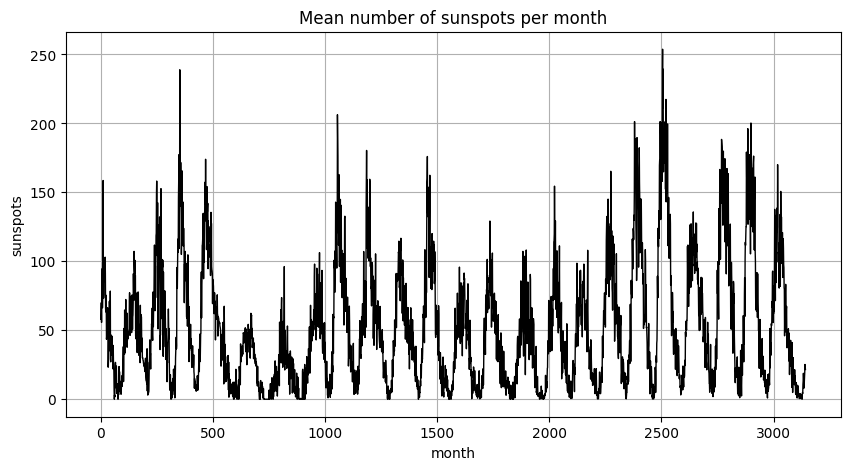

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

# Reading the data
time, series = np.loadtxt('ManchasSolares.txt', unpack=True)


plt.figure(figsize=(10,5))
plt.plot(time, series, color='black', linewidth=1)
plt.title('Mean number of sunspots per month')
plt.xlabel(r'month')
plt.ylabel(r'sunspots')
plt.grid()
plt.show()

---
## Preprocessing the data

In order to train the neural network, we will split the data set into training and test subsets. This time we will not split the set by taking randomly chosen data points. Instead, we will take the first 80% of the data to train the neural network and it will be used to predict the (future) behavior in the remaining 20% of the dataset. 

In [2]:
# split data into validation and training datasets
split_time = int(len(time)*0.8)

time_train = time[:split_time]
x_train = series[:split_time]

time_test = time[split_time:]
x_test = series[split_time:]

In [3]:
x_train.shape, x_test.shape

((2514,), (629,))

The idea is that the feature is a certain number of values in the series, while the label (or target) will be the next value. The number of values that we will treat as the feature will be called the **window size**. Hence, we said that we're taking a window of the data and training an ML model to predict the next value. 
For example, if we take our time series data 60 months at a time, we will use these 60 values as the feature and the next value is the label.

Now, we will define a function that creates the windows and shuffle the information into batches.

In [14]:
train_features = []
train_targets = []

numeroDatos = 60
caso = np.zeros(numeroDatos)
for i in range(len(x_train)-1):
    modulo = i%numeroDatos
    if (modulo == 0) and (i >= numeroDatos):
        train_features.append(caso)
        train_targets.append(x_train[i+1])
        caso = np.zeros(numeroDatos)
    
    caso[modulo] = x_train[i]

test_features = []
test_targets = []

for i in range(len(x_test)-1):
    modulo = i%numeroDatos
    if (modulo == 0) and (i >= numeroDatos):
        test_features.append(caso)
        test_targets.append(x_train[i+1])
        caso = np.zeros(numeroDatos)
    
    caso[modulo] = x_train[i]

train_features = np.asarray(train_features)
train_targets = np.asarray(train_targets)

test_features = np.asarray(test_features)
test_targets = np.asarray(test_targets)

print(train_features.shape,train_targets.shape,test_features.shape,test_targets.shape)

(41, 60) (41,) (10, 60) (10,)


The objective of this exercise is to define and to train a neural network that predicts the behavior of the data in the time series as described in the course lecture.

In [16]:
import tensorflow as tf

# Definición del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(train_features[0].size*2, activation='relu', input_shape=train_features[0].shape),
    tf.keras.layers.Dense(train_features[0].size*4, activation='relu'),
    tf.keras.layers.Dense(train_features[0].size*8, activation='relu'),
    tf.keras.layers.Dense(train_features[0].size*16, activation='relu'),
    tf.keras.layers.Dense(1, activation='selu')
])

# Compilación del modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.mean_squared_error])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 120)               7320      
                                                                 
 dense_6 (Dense)             (None, 240)               29040     
                                                                 
 dense_7 (Dense)             (None, 480)               115680    
                                                                 
 dense_8 (Dense)             (None, 960)               461760    
                                                                 
 dense_9 (Dense)             (None, 1)                 961       
                                                                 
Total params: 614,761
Trainable params: 614,761
Non-trainable params: 0
_________________________________________________________________


In [17]:
historial = model.fit(train_features,train_targets,epochs=1000)

Epoch 1/1000
2/2 [==============================] - 3s 38ms/step - loss: 4435.7393 - mean_squared_error: 4435.7393
Epoch 2/1000
2/2 [==============================] - 0s 29ms/step - loss: 1317.8047 - mean_squared_error: 1317.8047
Epoch 3/1000
2/2 [==============================] - 0s 30ms/step - loss: 950.9385 - mean_squared_error: 950.9385
Epoch 4/1000
2/2 [==============================] - 0s 28ms/step - loss: 539.5446 - mean_squared_error: 539.5446
Epoch 5/1000
2/2 [==============================] - 0s 27ms/step - loss: 467.3684 - mean_squared_error: 467.3684
Epoch 6/1000
2/2 [==============================] - 0s 27ms/step - loss: 271.3603 - mean_squared_error: 271.3603
Epoch 7/1000
2/2 [==============================] - 0s 37ms/step - loss: 231.4736 - mean_squared_error: 231.4736
Epoch 8/1000
2/2 [==============================] - 0s 32ms/step - loss: 269.1897 - mean_squared_error: 269.1897
Epoch 9/1000
2/2 [==============================] - 0s 24ms/step - loss: 190.4956 - mean_squ

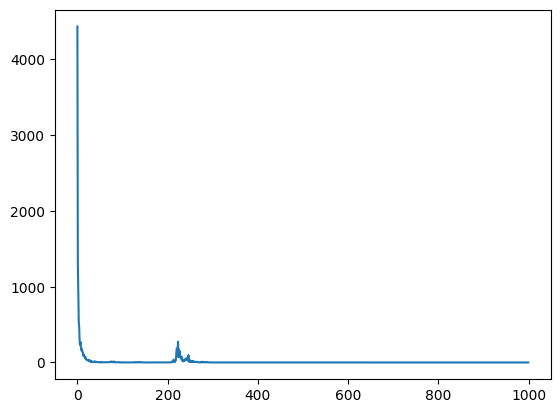

In [18]:
import matplotlib.pyplot as plt
plt.plot(historial.history["loss"])

1/1 [==============================] - 0s 135ms/step


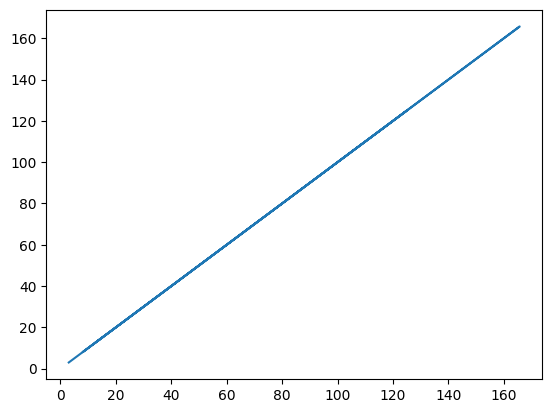

In [19]:
predicciones = model.predict(test_features)
plt.plot(predicciones,test_targets)

In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(predicciones, test_targets)
print(mse)

4.569687912064338e-11


In [40]:
model.save("red/SerieManchasSolares")

INFO:tensorflow:Assets written to: red/SerieManchasSolares/assets


INFO:tensorflow:Assets written to: red/SerieManchasSolares/assets


In [39]:
seriePredicha = list(series[:60])
#print(seriePredicha[-60:],print(test_features[0]))
l = len(seriePredicha)
largoTotal = len(series)
while l < largoTotal:
    input_array = np.array(seriePredicha[-60:]).reshape(1, -1)
    input_tensor = tf.convert_to_tensor(input_array, dtype=tf.float32)
    seriePredicha.append(model.predict(input_tensor))
    l = len(seriePredicha)
    print(l)

1/1 [==============================] - 0s 46ms/step


61
1/1 [==============================] - 0s 33ms/step
62
1/1 [==============================] - 0s 37ms/step
63


/tmp/ipykernel_4025/1103726901.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  input_array = np.array(seriePredicha[-60:]).reshape(1, -1)


1/1 [==============================] - 0s 39ms/step
64
1/1 [==============================] - 0s 39ms/step
65
1/1 [==============================] - 0s 38ms/step
66
1/1 [==============================] - 0s 31ms/step
67
1/1 [==============================] - 0s 35ms/step
68
1/1 [==============================] - 0s 29ms/step
69
1/1 [==============================] - 0s 31ms/step
70
1/1 [==============================] - 0s 36ms/step
71
1/1 [==============================] - 0s 26ms/step
72
1/1 [==============================] - 0s 29ms/step
73
1/1 [==============================] - 0s 33ms/step
74
1/1 [==============================] - 0s 32ms/step
75
1/1 [==============================] - 0s 28ms/step
76
1/1 [==============================] - 0s 25ms/step
77
1/1 [==============================] - 0s 30ms/step
78
1/1 [==============================] - 0s 29ms/step
79
1/1 [==============================] - 0s 26ms/step
80
1/1 [==============================] - 0s 32ms/step
81
1/1 [=====

/home/dvill/.local/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


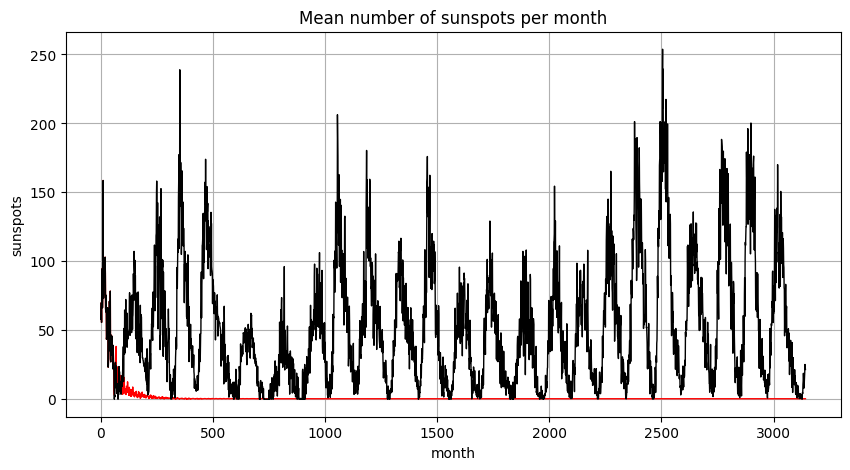

In [43]:
plt.figure(figsize=(10,5))
plt.plot(time,seriePredicha, color='red', linewidth=1)
plt.plot(time,series, color='black', linewidth=1)
plt.title('Mean number of sunspots per month')
plt.xlabel(r'month')
plt.ylabel(r'sunspots')
plt.grid()
plt.show()

In [42]:
mse = mean_squared_error(seriePredicha, series)
print(mse)

[[4529.4727]]


/home/dvill/.local/lib/python3.10/site-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)


El modelo no sabe cambiar de direccion

In [44]:
predicciones = model.predict(test_features)

1/1 [==============================] - 0s 25ms/step


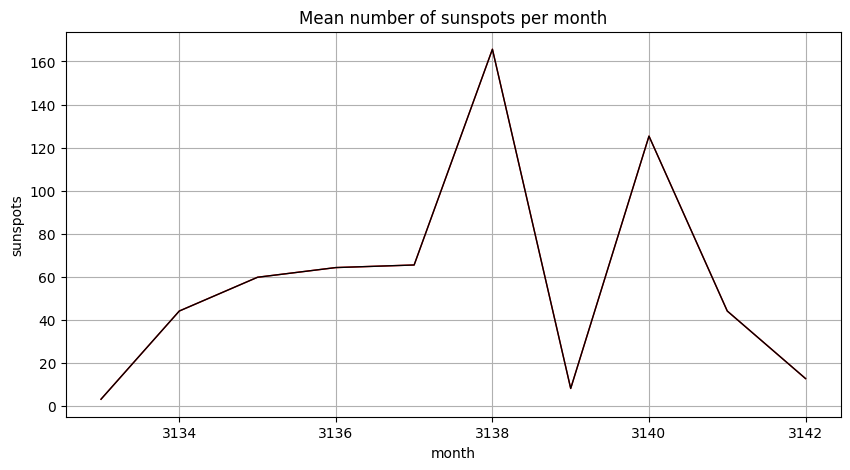

In [45]:
plt.figure(figsize=(10,5))
plt.plot(time[-len(test_targets):],predicciones, color='red', linewidth=1)
plt.plot(time[-len(test_targets):],test_targets, color='black', linewidth=1)
plt.title('Mean number of sunspots per month')
plt.xlabel(r'month')
plt.ylabel(r'sunspots')
plt.grid()
plt.show()